# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

#### I have found this dataset that holds information about electric vehicles from the NYU Libraries and I have imported it here.

In [5]:
import pandas as pd
df = pd.read_csv('data/ev.csv')
print(df.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make   
0  5YJ3E1EB4L     Yakima     Yakima    WA      98908.0        2020  TESLA  \
1  5YJ3E1EA7K  San Diego  San Diego    CA      92101.0        2019  TESLA   
2  7JRBR0FL9M       Lane     Eugene    OR      97404.0        2021  VOLVO   
3  5YJXCBE21K     Yakima     Yakima    WA      98908.0        2019  TESLA   
4  5UXKT0C5XH  Snohomish    Bothell    WA      98021.0        2017    BMW   

     Model                   Electric Vehicle Type   
0  MODEL 3          Battery Electric Vehicle (BEV)  \
1  MODEL 3          Battery Electric Vehicle (BEV)   
2      S60  Plug-in Hybrid Electric Vehicle (PHEV)   
3  MODEL X          Battery Electric Vehicle (BEV)   
4       X5  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range   
0           Clean Alternative Fuel Vehicle Eligible             322  \
1           Clean Alternative Fuel Vehicle Eligible             220   

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

This shows 5 rows, seletected at random, from the `ev.csv` dataset. 

In [9]:
import pandas as pd
df = pd.read_csv('data/ev.csv')
random_rows = df.sample(n=5)
print(random_rows)

       VIN (1-10)     County        City State  Postal Code  Model Year   
22662  5UXKT0C39H  Snohomish     Bothell    WA      98021.0        2017  \
61871  5YJ3E1EB9L       King  Snoqualmie    WA      98065.0        2020   
69125  WA1VABGEXK       King     Seattle    WA      98117.0        2019   
62694  1N4BZ1BV3N       King     Seattle    WA      98103.0        2022   
45303  5YJ3E1EB2L       King     Seattle    WA      98103.0        2020   

         Make    Model                   Electric Vehicle Type   
22662     BMW       X5  Plug-in Hybrid Electric Vehicle (PHEV)  \
61871   TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
69125    AUDI   E-TRON          Battery Electric Vehicle (BEV)   
62694  NISSAN     LEAF          Battery Electric Vehicle (BEV)   
45303   TESLA  MODEL 3          Battery Electric Vehicle (BEV)   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range   
22662              Not eligible due to low battery range              14  \


This cell below shows each of the column names and their respective data types.

In [10]:
import pandas as pd
df = pd.read_csv('data/ev.csv')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         124716 non-null  object 
 1   County                                             124714 non-null  object 
 2   City                                               124714 non-null  object 
 3   State                                              124716 non-null  object 
 4   Postal Code                                        124714 non-null  float64
 5   Model Year                                         124716 non-null  int64  
 6   Make                                               124716 non-null  object 
 7   Model                                              124535 non-null  object 
 8   Electric Vehicle Type                              124716 non-null  object

This cell shows all duplicated or missing values within the dataset. This is unique because it is helpful to pinpoint which columns will result in N/A values or pinpoint any missing values that might affect the data analysis.

In [11]:
import pandas as pd
df = pd.read_csv('data/ev.csv')
print(df.isnull().sum())
print(df.duplicated().sum())


VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                181
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 297
DOL Vehicle ID                                         0
Vehicle Location                                      29
Electric Utility                                     473
2020 Census Tract                                      2
dtype: int64
0


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

#### This cell below removes the rows with missing values that will display or disrupt the dataset. The clean dataframe will also be printed for reference.

In [28]:
import pandas as pd
df = pd.read_csv('data/ev.csv')
df = df.dropna()
print(df)


        VIN (1-10)     County         City State  Postal Code  Model Year   
0       5YJ3E1EB4L     Yakima       Yakima    WA      98908.0        2020  \
3       5YJXCBE21K     Yakima       Yakima    WA      98908.0        2019   
4       5UXKT0C5XH  Snohomish      Bothell    WA      98021.0        2017   
5       1N4AZ0CP4F  Snohomish      Everett    WA      98201.0        2015   
6       5YJ3E1EBXJ     Kitsap      Poulsbo    WA      98370.0        2018   
...            ...        ...          ...   ...          ...         ...   
124711  5YJ3E1EB6N  Snohomish       Monroe    WA      98272.0        2022   
124712  KNDCM3LD2L     Pierce       Tacoma    WA      98406.0        2020   
124713  7SAYGDEE0P    Whatcom   Bellingham    WA      98226.0        2023   
124714  1G1FW6S03J     Pierce       Tacoma    WA      98444.0        2018   
124715  1G1RC6E47F     Benton  Benton City    WA      99320.0        2015   

             Make    Model                   Electric Vehicle Type   
0    

#### This cell below continues from the one above. However, this time around the columns that are irrelevant to the analysis will be dropped so I will not have to work with columns that are unecessary and distracting.

In [27]:
import pandas as pd
df = pd.read_csv('data/ev.csv')
df = df.dropna()
df = df.drop(columns=['Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Electric Utility'])
print(df)


        VIN (1-10)     County         City State  Postal Code  Model Year   
0       5YJ3E1EB4L     Yakima       Yakima    WA      98908.0        2020  \
3       5YJXCBE21K     Yakima       Yakima    WA      98908.0        2019   
4       5UXKT0C5XH  Snohomish      Bothell    WA      98021.0        2017   
5       1N4AZ0CP4F  Snohomish      Everett    WA      98201.0        2015   
6       5YJ3E1EBXJ     Kitsap      Poulsbo    WA      98370.0        2018   
...            ...        ...          ...   ...          ...         ...   
124711  5YJ3E1EB6N  Snohomish       Monroe    WA      98272.0        2022   
124712  KNDCM3LD2L     Pierce       Tacoma    WA      98406.0        2020   
124713  7SAYGDEE0P    Whatcom   Bellingham    WA      98226.0        2023   
124714  1G1FW6S03J     Pierce       Tacoma    WA      98444.0        2018   
124715  1G1RC6E47F     Benton  Benton City    WA      99320.0        2015   

             Make    Model                   Electric Vehicle Type   
0    

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

#### This cell below shows the top 10 states with the most amount of electric vehicles. 

In [35]:
import pandas as pd
df = pd.read_csv('data/ev.csv')
df = df.drop(columns=['Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Electric Utility'])
df = df.dropna()

state_counts = df['State'].value_counts()
top_states = state_counts.nlargest(10)
print("Top 10 states with the most electric vehicles:")
print(top_states)


Top 10 states with the most electric vehicles:
State
WA    124238
CA        80
VA        36
MD        27
TX        18
CO        10
NC         9
AZ         8
IL         7
CT         7
Name: count, dtype: int64


#### This cell includes the dropped N/A values and shows what the most common model of electric vehicles is.

In [36]:
import pandas as pd
df = pd.read_csv('data/ev.csv')
df = df.drop(columns=['Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Electric Utility'])
df = df.dropna()

most_common_model = df['Model'].value_counts().idxmax()
print("The most common electric vehicle model is:", most_common_model)


The most common electric vehicle model is: MODEL 3


#### This cell below shows the average and median electric range of these electric vehicles.

In [37]:
import pandas as pd
df = pd.read_csv('data/ev.csv')
df = df.drop(columns=['Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Electric Utility'])
df = df.dropna()


avg_range = df['Electric Range'].mean()
med_range = df['Electric Range'].median()

print(f"Average Electric Range: {avg_range}")
print(f"Median Electric Range: {med_range}")

Average Electric Range: 79.58518625585187
Median Electric Range: 25.0


#### The cell below shows top 10 makes and their counts.

In [41]:
import pandas as pd
df = pd.read_csv('data/ev.csv')
df = df.drop(columns=['Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Electric Utility'])
df = df.dropna()

make_counts = df.groupby('Make')['VIN (1-10)'].count()

# Find the top 10 electric vehicle makes
top_makes = make_counts.nlargest(10)

# Print the model counts for the top 10 make
print("Electric Vehicle Make Counts (Top 10):")
print(top_makes)

Electric Vehicle Make Counts (Top 10):
Make
TESLA         57122
NISSAN        12946
CHEVROLET     10836
FORD           6680
BMW            5578
KIA            4843
TOYOTA         4666
VOLKSWAGEN     3369
AUDI           2485
VOLVO          2337
Name: VIN (1-10), dtype: int64


#### This cell below shows the average electric vehicle range sorted by their states. Any states with an average vehicle range of 0 will not be printed for analysis purposes. 

In [43]:
import pandas as pd
df = pd.read_csv('data/ev.csv')
df = df.drop(columns=['Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Electric Utility'])
df = df.dropna()
state_stats = df.groupby('State')['Electric Range'].mean()
sorted_states = state_stats[lambda x: x > 0].sort_values(ascending=False)[:10]
print("Top 10 States by Average Electric Vehicle Range (Sorted):")
print(sorted_states)


Top 10 States by Average Electric Vehicle Range (Sorted):
State
NH    308.000000
MN    220.000000
AL    220.000000
IN    210.000000
WY    161.000000
AR    157.333333
DC    156.600000
MO    153.500000
NE    144.250000
FL    143.000000
Name: Electric Range, dtype: float64


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

#### This cell below shows a pie chart of the percentages of each model. We saw that the Model 3 was the most popular electric vehicle and this pie chart further comfirms that Tesla reigns high with making up 61.3% of the electric vehicle population.

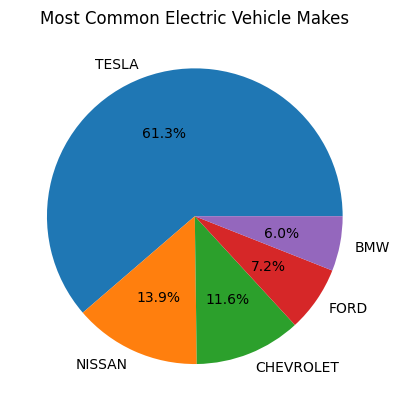

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from a CSV file
df = pd.read_csv('data/ev.csv')

# Drop columns with missing or null values
df = df.drop(columns=['Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Electric Utility'])
df = df.dropna()

# Count the number of electric vehicles by make
make_counts = df.groupby('Make')['VIN (1-10)'].count()

# Get the top 5 makes
top_makes = make_counts.nlargest(5)

# Plot a pie chart of the most common makes
fig, ax = plt.subplots()
ax.pie(top_makes, labels=top_makes.index, autopct='%1.1f%%')
ax.set_title('Most Common Electric Vehicle Makes')
plt.show()



#### This stacked area chart of the number of vehicles by model and year shows the increasing trend of electric vehicles over the years. We are able to see the emergence of electric vehicles between the years of 2010-2015 but the biggest spike was after the year of 2020. 

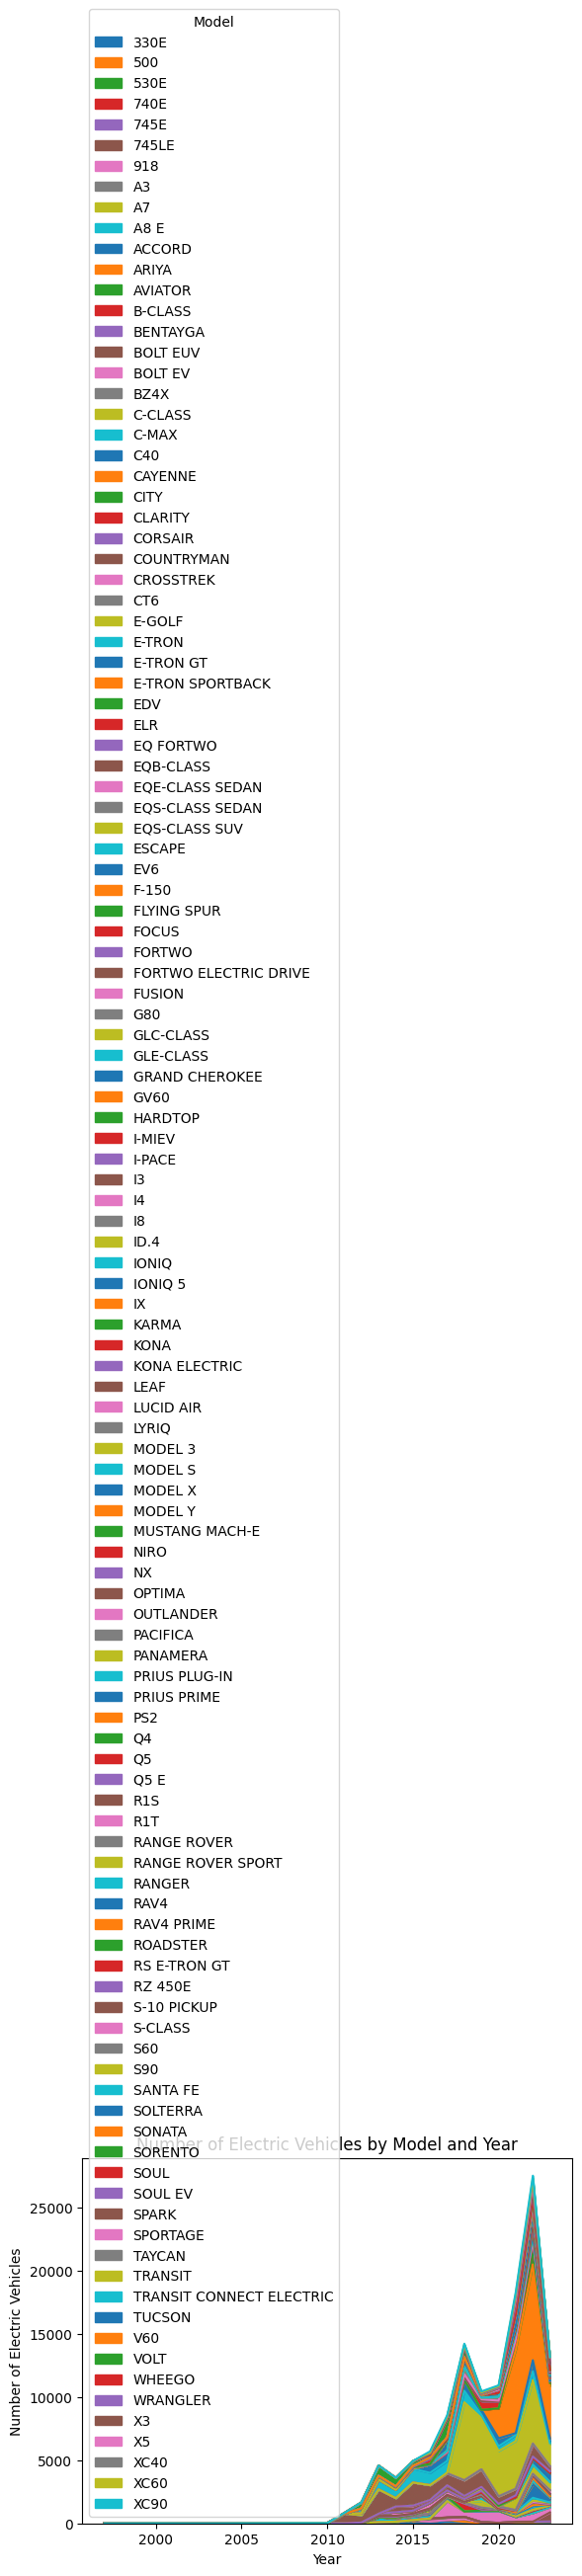

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/ev.csv')
df = df.drop(columns=['Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Electric Utility'])
df = df.dropna()

# Count the number of electric vehicles by model and year
model_year_counts = df.groupby(['Model', 'Model Year'])['VIN (1-10)'].count()

# Reshape the data into a pivot table
model_year_pivot = model_year_counts.reset_index().pivot(index='Model Year', columns='Model', values='VIN (1-10)')

# Plot a stacked area chart of the number of electric vehicles by model and year
model_year_pivot.plot(kind='area', stacked=True)
plt.title('Number of Electric Vehicles by Model and Year')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.show()


#### This cell below shows a bar chart of the number of electric vehicles on the eastern coast of the US. Focusing on the east coast, we see that Maryland and Virginia have the highest number of electric vehicles in their respective states. 

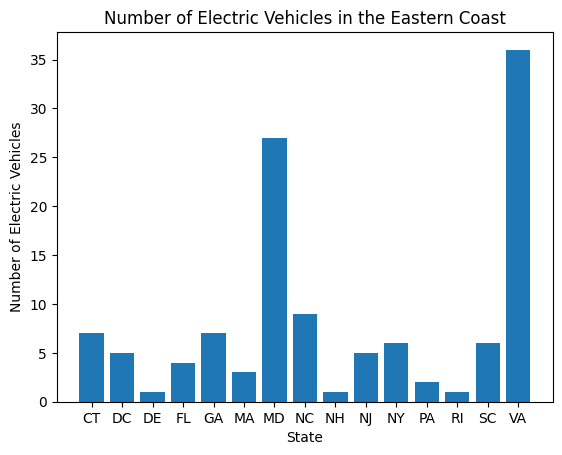

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/ev.csv')
df = df.drop(columns=['Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Electric Utility'])
df = df.dropna()

# Filter data for the eastern coast
eastern_coast = ['ME', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'DC', 'VA', 'NC', 'SC', 'GA', 'FL']
eastern_coast_data = df[df['State'].isin(eastern_coast)]

# Count the number of electric vehicles by state
state_counts = eastern_coast_data.groupby('State')['VIN (1-10)'].count()

# Plot a bar chart of the number of electric vehicles in the eastern coast
fig, ax = plt.subplots()
ax.bar(state_counts.index, state_counts.values)
ax.set_title('Number of Electric Vehicles in the Eastern Coast')
ax.set_xlabel('State')
ax.set_ylabel('Number of Electric Vehicles')
plt.show()



#### The cell below shows the pie chart of the percentages of electric vehicle types across the dataset. This pie chart is able to display the percentage difference between battery-operated electric vehicles compared to the plug in hybrid electric vehicles. With an overwhelming percentage of 77.2% we see that battery-operated electric vehicles remains as a popular consumer's choice. 

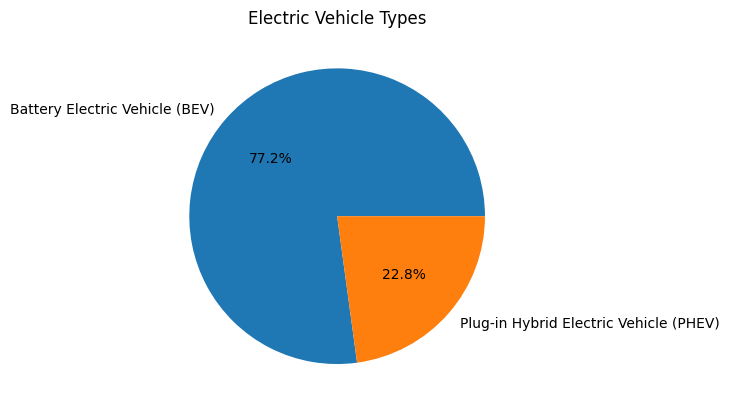

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from a CSV file
df = pd.read_csv('data/ev.csv')

# Drop columns with missing or null values
df = df.drop(columns=['Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Electric Utility'])
df = df.dropna()

# Count the number of electric vehicles of each type
type_counts = df['Electric Vehicle Type'].value_counts()

# Create a pie chart of the electric vehicle types
fig, ax = plt.subplots()
ax.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
ax.set_title('Electric Vehicle Types')
plt.show()


#### The cell below shows a bar graph that displays the states with the least amount of electric vehicles. It's important to understand both spectrums of the data so this bar graph is great to see the top 10 states with the least amount of electric vehicles. All of the states listed in the bar graph hold an equal amount of electric vehicle of one. 

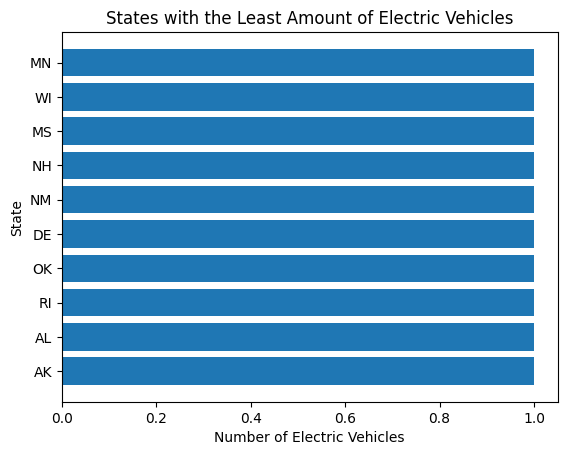

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from a CSV file
df = pd.read_csv('data/ev.csv')

# Drop columns with missing or null values
df = df.drop(columns=['Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Electric Utility'])
df = df.dropna()

# Group the data by state and calculate the total number of electric vehicles in each state
state_counts = df.groupby('State')['VIN (1-10)'].count()

# Sort the states by number of electric vehicles and select the 10 states with the least amount of electric vehicles
top_states = state_counts.sort_values().head(10)

# Create a horizontal bar chart of the number of electric vehicles in each of the 10 states with the least amount of electric vehicles
fig, ax = plt.subplots()
ax.barh(top_states.index, top_states.values)
ax.set_title('States with the Least Amount of Electric Vehicles')
ax.set_xlabel('Number of Electric Vehicles')
ax.set_ylabel('State')
plt.show()
